In [30]:
def square_trick(bias, slope, predictor, current_value, learning_rate):
    """
    y ~ bias + slope*predictor

    Performs increments wrt a scaled value and difference
    """
    predicted_value = slope * predictor + bias
    slope += learning_rate * predictor * (current_value - predicted_value)
    bias += learning_rate * (current_value - predicted_value)
    return slope, bias

In [31]:
def absolute_trick(bias, slope, predictor, current_value, learning_rate):
    """
    y ~ bias + slope*predictor

    Performs increments wrt a scaled value
    """
    predicted_value = slope * predictor + bias
    if current_value > predicted_value:
        slope += learning_rate * predictor
        bias += learning_rate
    elif current_value < predicted_value:
        slope-= learning_rate * predictor
        bias -= learning_rate
    return slope, bias

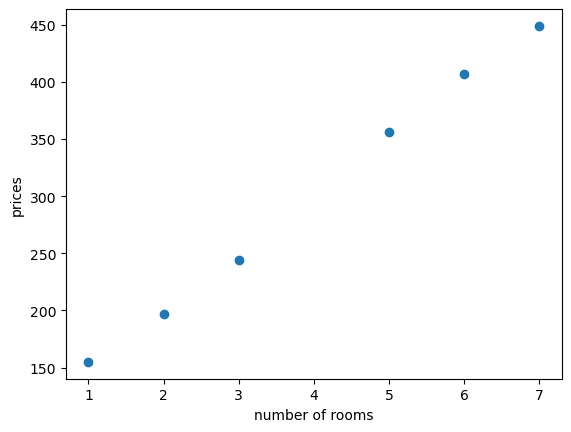

In [45]:
import numpy as np
import utils
from matplotlib import pyplot as plt
import tqdm # progress bar
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 197, 244, 356, 407, 449])

utils.plot_points(
    features=features,
    labels=labels,
    x_label='111',
    y_label='222',
)

In [33]:
import random

def simple_linear_regression(
    features: list, 
    labels: list,
    trick_function = absolute_trick,
    learning_rate: int = 0.01, 
    epochs: int = 1000,
    plot_all_epoch = True):
    """
    trick_function must follow y ~ b0 + b1x with parameters:
        bias,
        slope,
        predictor,
        current_value,
        learning_rate
    """
    slope = np.random.random()
    bias = np.random.random()
    for epoch in range(epochs):
        if plot_all_epoch:
            utils.draw_line(
                slope=slope,
                y_intercept=bias,
                starting=min(features)-1,
                ending=max(features)+1,
            )
        random_point_index = random.randint(0, len(features)-1)
        predictor = features[random_point_index]
        current_value = labels[random_point_index]
        slope, bias = trick_function(
            bias=bias,
            slope=slope,
            predictor=predictor,
            current_value=current_value,
            learning_rate=learning_rate,
        )
    utils.draw_line(
        slope=slope,
        y_intercept=bias,
        color="black",
        starting=0,
        ending=8,
    )
    utils.plot_points(
        features=features,
        labels=labels,
    )
    plt.show()
    print("Price per room: ", slope)
    print("Base price: ", bias)
    return slope, bias

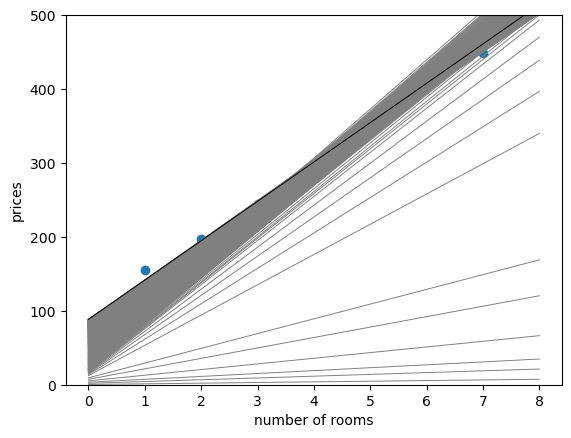

Price per room:  53.23757824823355
Base price:  88.35276407345299


(53.23757824823355, 88.35276407345299)

In [34]:
plt.ylim(0, 500)
simple_linear_regression(
    features=features,
    labels=labels,
    trick_function=square_trick,
    learning_rate=0.01,
    epochs=1000
)

In [35]:
def rmse(labels: list, predictions: list):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))

def linear_regression(
    features: list, 
    labels: list,
    trick_function = absolute_trick,
    learning_rate: int = 0.01, 
    error_metric = rmse,
    epochs: int = 1000,
    plot_all_epoch = True):
    """
    trick_function must follow y ~ b0 + b1x with parameters:
        bias,
        slope,
        predictor,
        current_value,
        learning_rate
    """
    slope = np.random.random()
    bias = np.random.random()
    errors = []
    for epoch in tqdm.tqdm(range(epochs)):
        if plot_all_epoch:
            utils.draw_line(
                slope=slope,
                y_intercept=bias,
                starting=min(features)-1,
                ending=max(features)+1,
            )
        prediction = features[0]*slope + bias
        errors.append(error_metric(labels=labels, predictions=prediction))
        
        random_point_index = random.randint(0, len(features)-1)
        predictor = features[random_point_index]
        current_value = labels[random_point_index]
        slope, bias = trick_function(
            bias=bias,
            slope=slope,
            predictor=predictor,
            current_value=current_value,
            learning_rate=learning_rate,
        )
    utils.draw_line(
        slope=slope,
        y_intercept=bias,
        color="black",
        starting=0,
        ending=8,
    )
    utils.plot_points(
        features=features,
        labels=labels,
    )
    plt.show()

    utils.plot_points(
        features=range(len(errors)),
        labels=errors,
        x_label="Number of Epochs",
        y_label="Numerical Error",
    )
    print("Price per room: ", slope)
    print("Base price: ", bias)
    return slope, bias

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2517.03it/s]


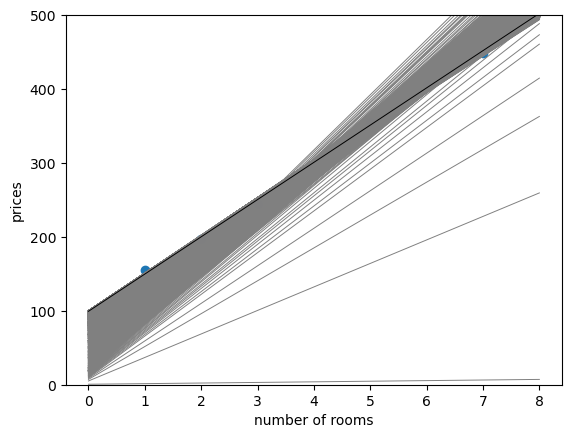

Price per room:  50.37959641496576
Base price:  99.3076840211719


(50.37959641496576, 99.3076840211719)

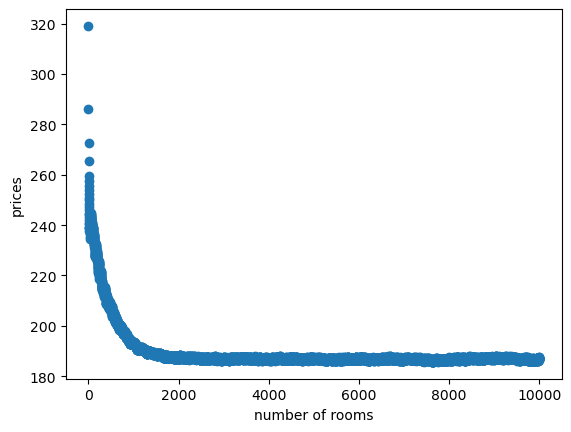

In [46]:
plt.ylim(0, 500)
linear_regression(
    features=features,
    labels=labels,
    trick_function=square_trick,
    learning_rate=0.01,
    epochs=10000
)